
# <center>**Astrophysical Techniques - Final Project**</center>  
### <center>**CCD Photometry with 1.4m Milankovic Telescope**</center>  
##### <center>Basic Data Reduction and Aperture Photometry of AGN</center>

---
 
**Master in Astrophysics and Space Science (MASS)** 

**Department of Astronomy, University of Belgrade**

**May 2025**  

**Student:** Nandita Das  
**Instructor:** Prof. Dragana Ilić

---

#### **Photometry Data Reduction** 

Astronomical image data reduction is a crucial first step in astronomical data analysis. For photom
three basic requirements are to correct for bias, flat-field, and dark current. These steps are fol
astrometric calibration, ensuring accuracy in measuring the position and brightness of celestial ob

Aperture photometry integrates the observed flux within a specified aperture (radius from the cente
object) and subtracts the sky background to calculate the object’s flux. The result is an instrumen
magnitude, which is then converted to an absolute magnitude using standard stars in the same field.

#### **Aim**

The primary objective of this project is to analyze the photometry of three AGN objects observed on 
October 22, 2023, using the 1.4m Milankovic Telescope equipped with an iKonL CCD. The observations 
were made in the B, V, R, Ha, SII, and red-continuum filters. The goal is to 
perform the standard data reduction procedures (bias, dark, and flat-field corrections) and aperture 
photometry to determine the flux and magnitudes of these AGN objects.

The observed objects and their respective V band magnitudes are as follows:

| **Object** | **RA**         | **Dec**       | **V (mag)** |
|------------|----------------|---------------|-------------|
| Mrk335     | 00 06 19       | +20 12 10     | 13.85       |
| Mrk6       | 06 52 12       | +74 25 37     | 14.19       |
| Mrk817     | 14 36 22       | +58 47 39     | 12.8        |

> Note: Some of the calibration files were acquired on October 22, 2023, using a different CCD 
readout mode. You may also use calibration files from October 14, 2023 if available.

### **Tasks**

1. CCD Image Reduction  
   Perform CCD image reduction in all filters for at least one of the observed objects using the provided 
pipeline for the 1.4m Milankovic Telescope. More information on the pipeline can be found on the 
[GitHub repository](https://github.com/anavudragovic/pipeline).

2. Obtain Instrumental Magnitudes
   Experiment with different aperture radii and measure how the object magnitudes vary. This will help 
determine the optimal aperture size for accurate photometry.

3. Absolute Photometric Calibration  
   Convert the instrumental magnitudes to absolute magnitudes using standard stars from the same field of 
view. Compare your results with other sources and ensure consistency.



### **Import Libraries**

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
import os
from os import listdir
import pandas as pd
import numpy as np
import seaborn as sns
from astroquery.simbad import Simbad

### **Task 1: CCD Image Reduction**

It is necessary to install the necessary dependencies before using pipeline using pip in working environment:
   - psutil v5.9.0
   - ccdproc v2.4.2
   - astropy v5.3.4
   - photutils v1.13.0
   - scipy v1.13.1
   - twirl v0.4.2
   - pandas v2.2.2

Clone the repository  to your working directory by running this command:
   
        git clone https://github.com/anavudragovic/pipeline 

Run the pipeline code on our files:
    
        run pipeline/reduce.py -c -b -s   

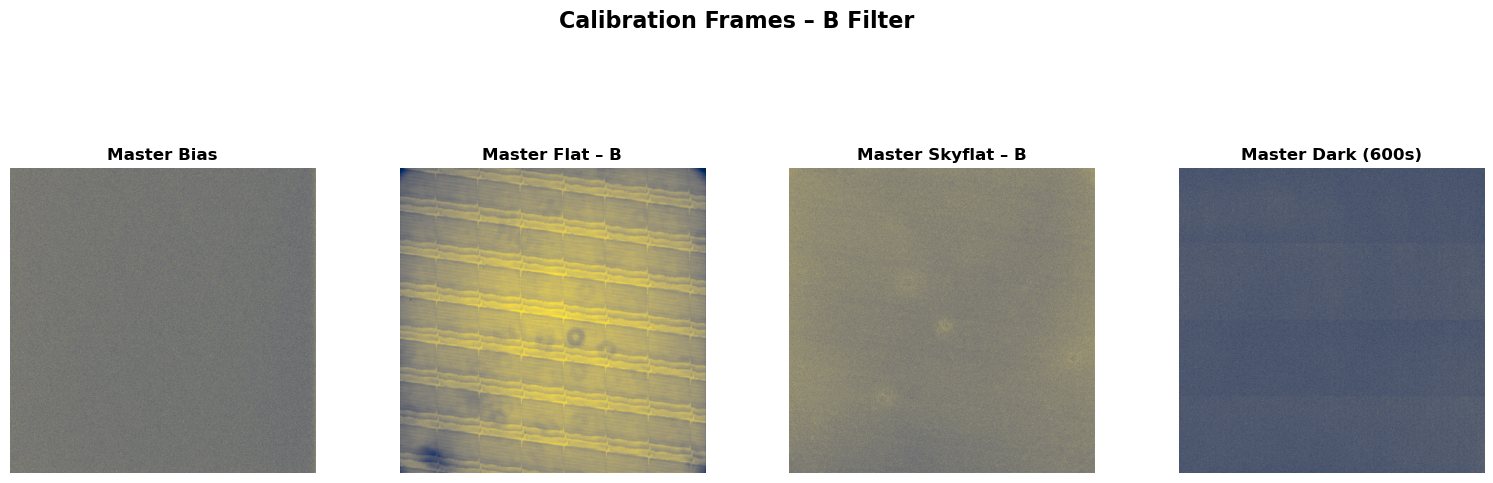

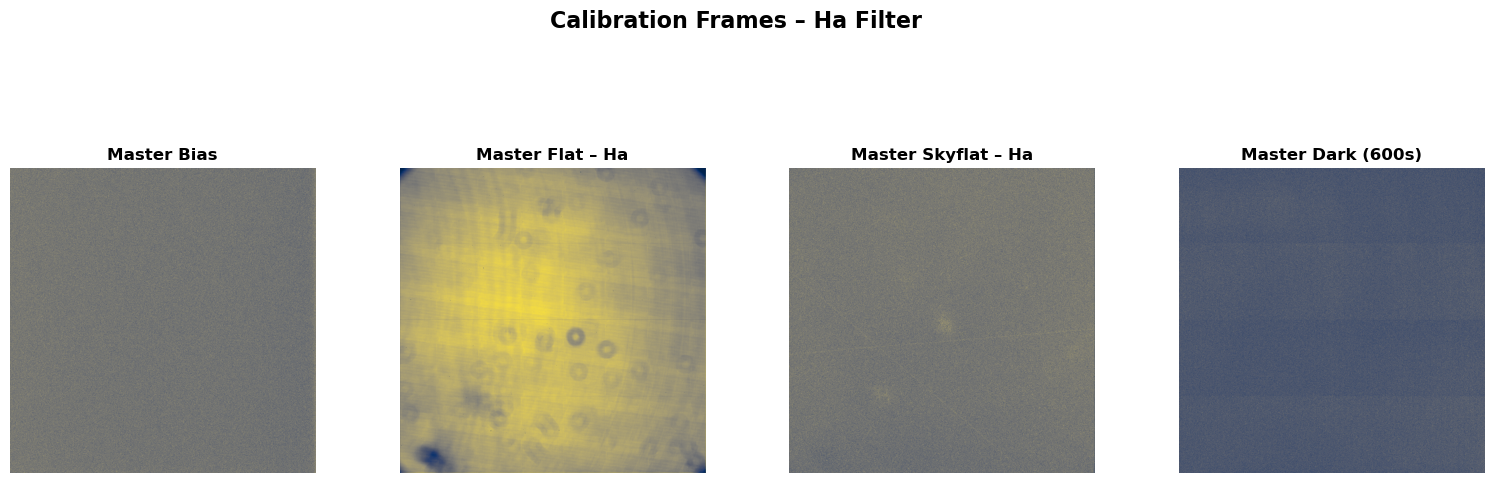

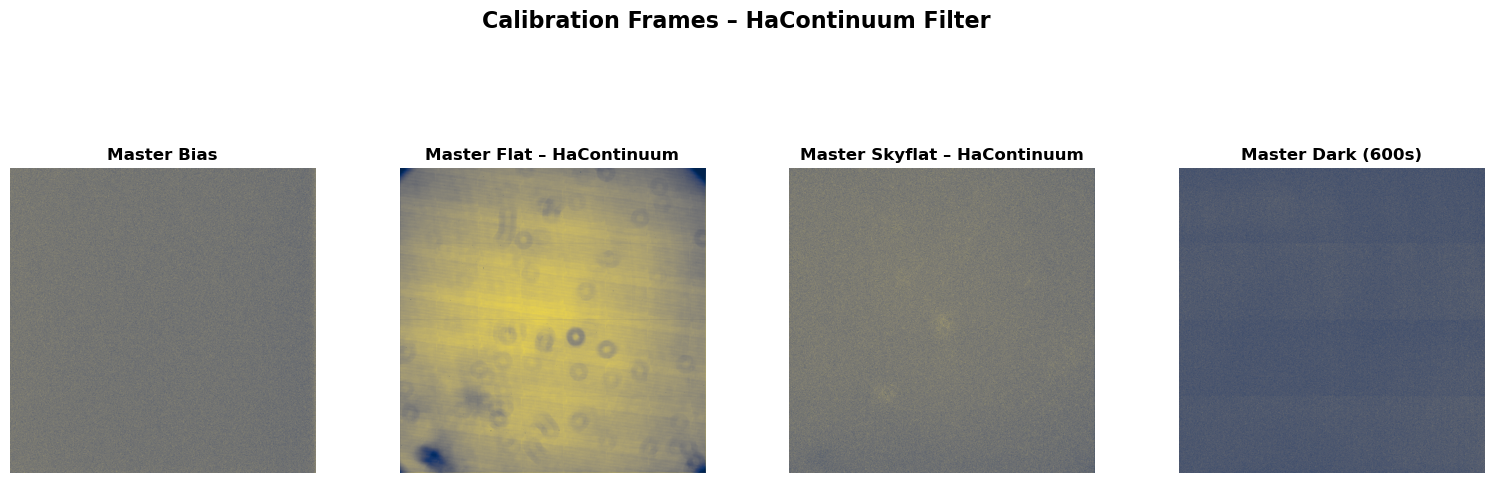

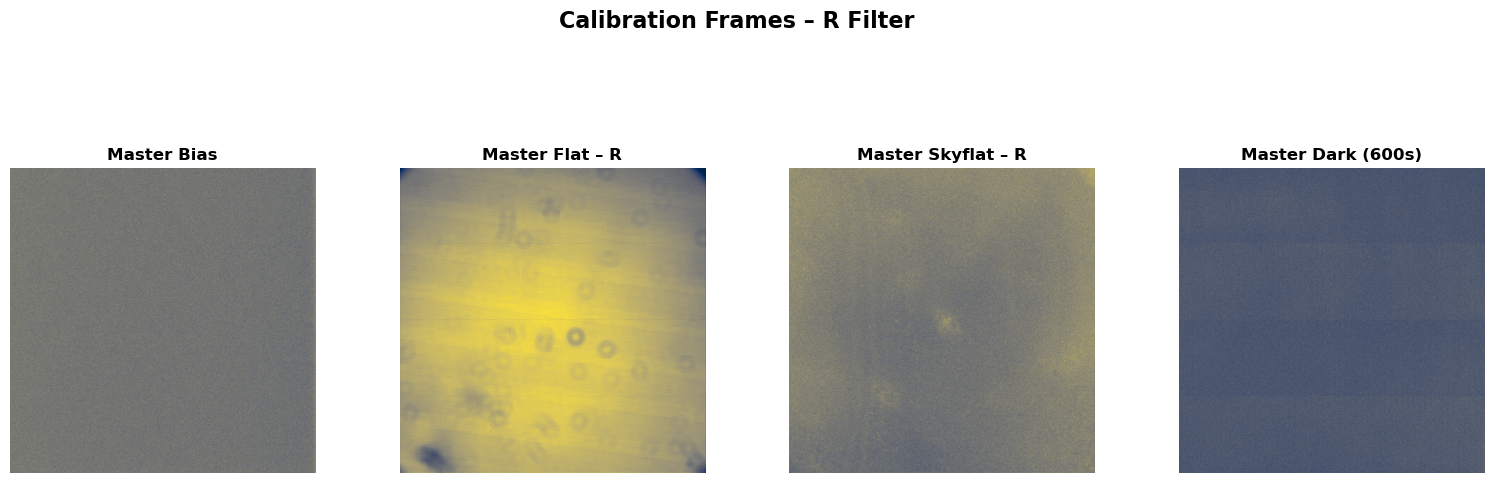

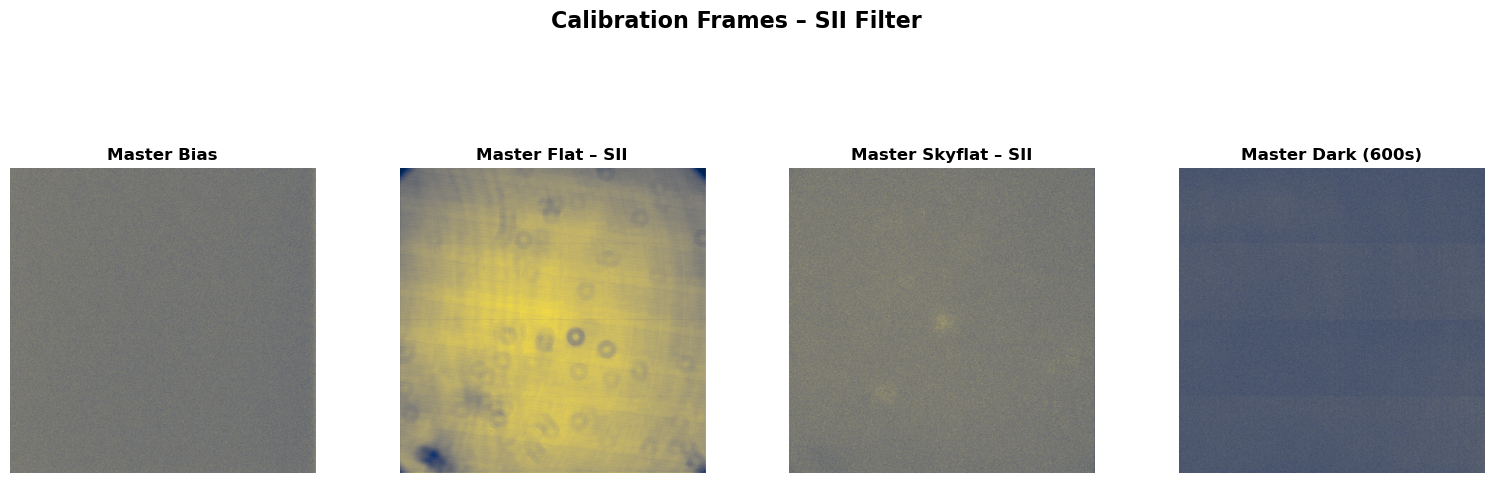

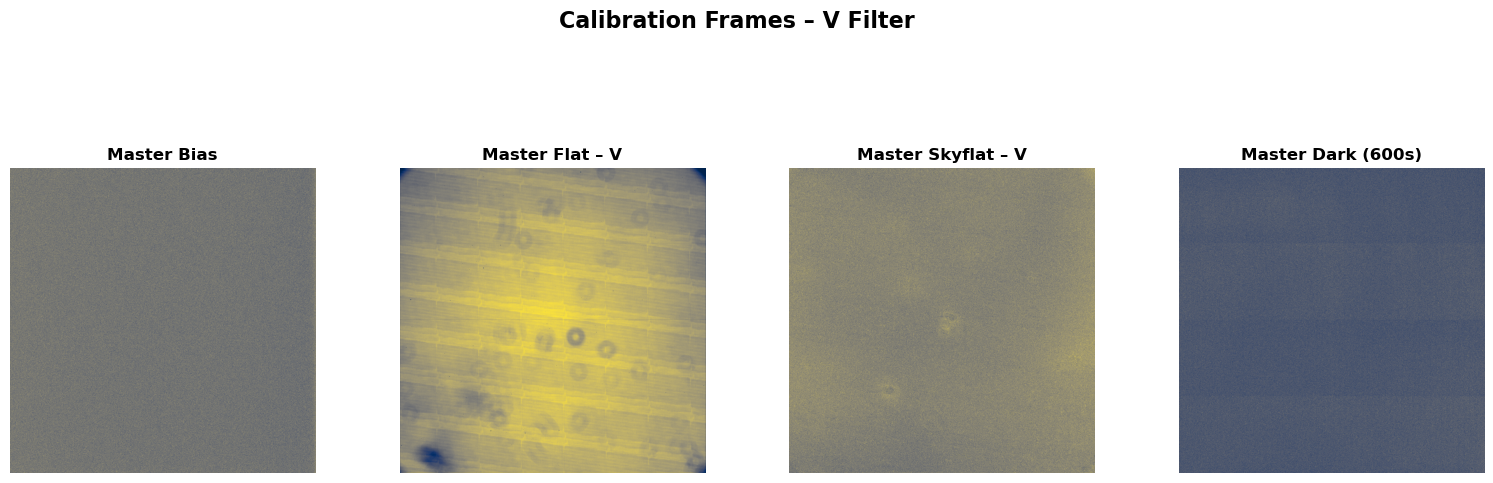

In [3]:
# Define calibration directory and load master bias and dark frames
calib_dir = '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/calibration'

# Load master bias and dark frames with checks for file existence
bias = fits.getdata(os.path.join(calib_dir, 'mBias.fits')) if os.path.exists(os.path.join(calib_dir, 'mBias.fits')) else None
dark = fits.getdata(os.path.join(calib_dir, 'mDark_600sec.fits')) if os.path.exists(os.path.join(calib_dir, 'mDark_600sec.fits')) else None

# Identify filters with both master flat and skyflat available
flat_files = [f for f in os.listdir(calib_dir) if f.startswith('mFlat_') and f.endswith('.fits')]
skyflat_files = [f for f in os.listdir(calib_dir) if f.startswith('mSkyflat_') and f.endswith('.fits')]
filters = sorted(set(
    f.replace('mFlat_', '').replace('.fits', '') for f in flat_files
    if f.replace('mFlat_', 'mSkyflat_') in skyflat_files
))

# Define display scaling using ZScaleInterval for automatic scaling
z = ZScaleInterval()
zminb, zmaxb = z.get_limits(bias) if bias is not None else (0, 1)
zmind, zmaxd = z.get_limits(dark) if dark is not None else (0, 1)

# Plot calibration frames for each filter
for filt in filters:
    flat = fits.getdata(os.path.join(calib_dir, f'mFlat_{filt}.fits'))
    skyflat = fits.getdata(os.path.join(calib_dir, f'mSkyflat_{filt}.fits'))
    zminf, zmaxf = z.get_limits(flat)
    zmins, zmaxs = z.get_limits(skyflat)

    # Create a figure with 4 subplots in a row
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(16, 6), ncols=4)
    fig.suptitle(f'Calibration Frames – {filt} Filter', fontsize=16, fontweight='bold')
    fig.tight_layout(pad=3.0)

    # Master Bias Plot
    ax1.set_title('Master Bias', fontsize=12, fontweight='bold')
    if bias is not None:
        ax1.imshow(bias, origin='lower', cmap='cividis', vmin=zminb, vmax=zmaxb)
        ax1.set_axis_off()  # Removing axes for clean visualization
    else:
        ax1.axis('off')

    # Master Flat Plot
    ax2.set_title(f'Master Flat – {filt}', fontsize=12, fontweight='bold')
    ax2.imshow(flat, origin='lower', cmap='cividis', vmin=zminf, vmax=zmaxf)
    ax2.set_axis_off()

    # Master Skyflat Plot
    ax3.set_title(f'Master Skyflat – {filt}', fontsize=12, fontweight='bold')
    ax3.imshow(skyflat, origin='lower', cmap='cividis', vmin=zmins, vmax=zmaxs)
    ax3.set_axis_off()

    # Master Dark Plot
    ax4.set_title('Master Dark (600s)', fontsize=12, fontweight='bold')
    if dark is not None:
        ax4.imshow(dark, origin='lower', cmap='cividis', vmin=zmind, vmax=zmaxd)
        ax4.set_axis_off()
    else:
        ax4.axis('off')

    plt.show()

### **Task 2: Aperture Magnitude Measurement**

In [4]:
# python pipeline/reduce.py -a -p -l
# And then perform photometry for a range of FWHM from pixels: 
# python /home/data/ reduce.py -a -p -l -x i 
# then move these individual photometry files to a different folder.

In [5]:
# List of target names for which photometry data will be processed
target_names = ['Mrk6', 'Mrk335', 'Mrk817']

# Main directory containing the data for different photometry files
main_dir = '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/'

# Generate a list of photometry directories by scanning through 'main_dir' and 
# selecting only those directories that contain 'photometry' in their name
photometry_dirs = [main_dir + file + '/' for file in listdir(main_dir) if 'photometry' in file]

# Print the list of photometry directories
photometry_dirs

['/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x6_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x3_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x4_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x1_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x2_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x7_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x5_photometry/',
 '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/diff_photometry/x8_photometry/']

In [6]:
# Initialize an empty dictionary to store the photometry data for each target
master_phot_dfs = {}

# Iterate over the list of target names
for target_name in target_names:
    # Create a dictionary to store the photometry data and paths for each target
    photometry_dir_dict = {}

    # Iterate over each photometry directory
    for photometry_dir in photometry_dirs:
        # Build the path to the photometry file for the current target by adding it to the dictionary
        # The key is derived from the photometry directory's name, extracting a part before the underscore
        # and appending '_path' to it (e.g., 'dir_name_path')
        photometry_dir_dict[photometry_dir.split('/')[-2].split('_')[0] + '_path'] = photometry_dir + f'{target_name}_photometry.txt'
        
        # Read the photometry data from the file using pandas, specifying the separator and handling comments
        df = pd.read_csv(photometry_dir + f'{target_name}_photometry.txt', sep=r'\s+', header=0, comment='#')
        
        # Sort the DataFrame by 'FILTER' and 'FILENAME' columns and reset the index
        # This will ensure that the data is in a consistent order for further processing
        df.sort_values(by=['FILTER', 'FILENAME'], inplace=True, ignore_index=True)
        
        # Store the DataFrame in the dictionary with the key being the photometry directory's name (derived from the directory structure)
        photometry_dir_dict[photometry_dir.split('/')[-2].split('_')[0] + '_df'] = df

    # Once all photometry data for the target are collected, store it in the master dictionary
    # The key is the target's name, and the value is the photometry directory dictionary
    master_phot_dfs[target_name] = photometry_dir_dict

In [7]:
for target_name, target_name_dict in master_phot_dfs.items():
    # Iterate over the dictionary of target names, 'master_phot_dfs', where:
    # 'target_name' is the key (e.g., 'Mrk6') and 'target_name_dict' is the value (the dictionary for each target)

    for xFWHM, master_phot_df in target_name_dict.items():
        # Iterate over the dictionary (target_name_dict) that contains photometry data frames.
        # 'xFWHM' is the key, which likely represents the Full Width at Half Maximum (FWHM) value of the images,
        # and 'master_phot_df' is the corresponding DataFrame for that specific 'xFWHM' value.

        if 'df' in xFWHM:
            # Check if the key 'xFWHM' contains 'df'. This is a way to filter for DataFrames specifically,
            # as 'df' is likely part of the naming convention for dataframes.

            # Use the 'query' method to filter out any rows where the value in the 'FILENAME' column is equal to the string 'FILENAME'.
            # This is often a placeholder or header row that does not contain valid data, so the query is used to remove such rows.
            master_phot_dfs[target_name][xFWHM] = master_phot_df.query("FILENAME != 'FILENAME'").reset_index(drop=True)
            # After filtering, reset the DataFrame's index, removing the old index column with 'drop=True'.

In [8]:
def error_on_mean(errors):
    return np.sqrt(np.sum(np.square(errors))) / len(errors)

In [9]:
# Ensure the 'return_filter_magnitudes' function is defined before calling it

def return_filter_magnitudes(target_master_phot_dfs):
    df = pd.concat(target_master_phot_dfs)
    df['mag'] = pd.to_numeric(df['mag'])
    df['mag_err'] = pd.to_numeric(df['mag_err'])

    target_dict = {}
    
    # Group by FILTER to separate data by different filters
    filter_grouped = df.groupby(by='FILTER', observed=True)
    for filter_name, filter_df in filter_grouped:
        fwhms = []
        filter_mags = []
        filter_mag_errs = []

        # Group by FWHM to analyze the data based on different aperture sizes
        fwhmm_grouped = filter_df.groupby(by='FWHM', observed=True, sort=False)
        for fwhm, fwhm_filter_df in fwhmm_grouped:
            fwhms.append(fwhm)
            filter_mags.append(np.mean(fwhm_filter_df['mag'].to_numpy()))
            filter_mag_errs.append(error_on_mean(fwhm_filter_df['mag_err'].to_numpy()))

        # Store the results for each filter
        target_dict[filter_name] = np.column_stack([fwhms, filter_mags, filter_mag_errs])
        
    return target_dict

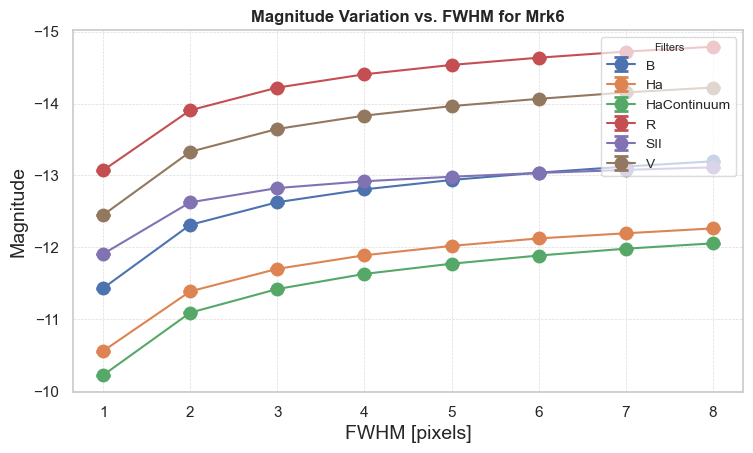

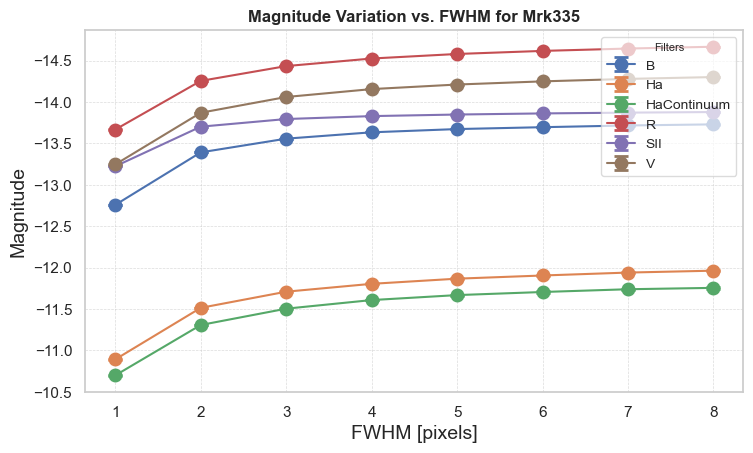

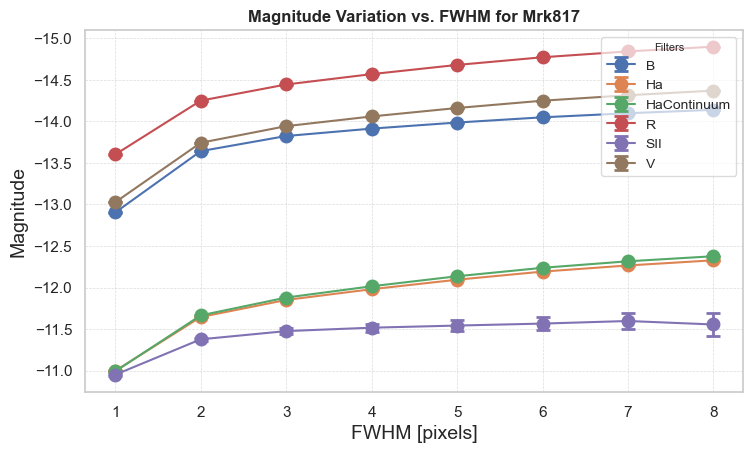

In [10]:
# Set the Seaborn style and context for better readability
sns.set(style="whitegrid", palette="deep", font_scale=1)

# Loop through all target names
for target_name in master_phot_dfs:
    # Create a new figure for each target
    fig, ax = plt.subplots(figsize=(8, 5))  # Larger figure size for better readability

    # Retrieve magnitude data by calling the 'return_filter_magnitudes' function
    target_dict = return_filter_magnitudes([master_phot_dfs[target_name][f'x{i}_df'] for i in range(1, 9)])

    # Iterate over each filter and plot the data
    for filter_name, array in target_dict.items():
        fwhms = array[:, 0].astype(float)  # FWHM values
        mags = array[:, 1].astype(float)   # Magnitudes
        magerrs = array[:, 2].astype(float)  # Magnitude errors

        # Use Seaborn's color palette to differentiate each filter
        color = sns.color_palette("deep")[list(target_dict.keys()).index(filter_name)]

        # Plot using error bars with enhanced aesthetics
        ax.errorbar(fwhms, mags, yerr=magerrs, label=f'{filter_name}', fmt='o', capsize=5, 
                    elinewidth=2, linestyle='-', markersize=8, color=color, markeredgewidth=2)

    # Invert the y-axis to follow astronomical convention
    ax.invert_yaxis()

    # Set plot title, labels, and adjust for better clarity
    ax.set_title(f'Magnitude Variation vs. FWHM for {target_name}', fontsize=12, weight='bold')
    ax.set_xlabel('FWHM [pixels]', fontsize=14)
    ax.set_ylabel('Magnitude', fontsize=14)

    # Customize the legend to be more professional
    ax.legend(title="Filters", loc="upper right", fontsize=10, title_fontsize=8, fancybox=True, framealpha=0.7)

    # Improve the grid and layout for better visual balance
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout(pad=2.0)  # Make sure there's no overlap in labels and titles

    # Show the plot
    plt.show()

### **Task 3: Absolute Photometric Calibration**

In [11]:
# We do absolute photometry for Mrk 6. 
# We provide the pipeline with the file Mrk6_stars.txt and 
# run the pipeline again to perform absolute photometry 
# python /home/data/ reduce.py -a -p -l

In [12]:
# Looking at the simbad columns available to us

np.array(Simbad.list_votable_fields()[["name", "description"]]['name'])

array(['mesDiameter', 'mesPM', 'mesISO', 'mesSpT', 'allfluxes', 'ident',
       'flux', 'mesOtype', 'mesPLX', 'otypedef', 'mesDistance', 'otypes',
       'mesVar', 'mesXmm', 'mesVelocities', 'has_ref', 'mesRot', 'biblio',
       'ids', 'mesHerschel', 'mesIUE', 'mesFe_h', 'alltypes', 'basic',
       'dec', 'main_id', 'otype_txt', 'ra', 'coo_bibcode',
       'coo_err_angle', 'coo_err_maj', 'coo_err_maj_prec', 'coo_err_min',
       'coo_err_min_prec', 'coo_qual', 'coo_wavelength', 'dec_prec',
       'galdim_angle', 'galdim_bibcode', 'galdim_majaxis',
       'galdim_majaxis_prec', 'galdim_minaxis', 'galdim_minaxis_prec',
       'galdim_qual', 'galdim_wavelength', 'hpx', 'morph_bibcode',
       'morph_qual', 'morph_type', 'nbref', 'oid', 'otype', 'plx_bibcode',
       'plx_err', 'plx_err_prec', 'plx_prec', 'plx_qual', 'plx_value',
       'pm_bibcode', 'pm_err_angle', 'pm_err_maj', 'pm_err_maj_prec',
       'pm_err_min', 'pm_err_min_prec', 'pm_qual', 'pmdec', 'pmdec_prec',
       'pmra', 'pm

In [13]:
# Define a list of objects related to MRK 6 and its companions
# This list contains the names of the primary object and its nearby companions that you want to query from SIMBAD.
mrk6_companions = ["MRK 6", "GSC 04371-00800", "GSC 04371-00113", "TYC 4371-867-1", "TYC 4371-167-1"]

# Initialize a Simbad object to interact with the SIMBAD database
# This object allows us to query the SIMBAD database for astronomical object information.
simbad = Simbad()

# Add VOTable fields for B, V, and R magnitudes to the SIMBAD query
# VOTable fields specify the types of data that we want to retrieve for each object.
# B, V, and R correspond to the magnitudes in the blue, visual, and red filters, respectively.
simbad.add_votable_fields("B", "V", "R")

# Query SIMBAD for the objects in the mrk6_companions list
# The query will return the objects' properties, including their B, V, and R magnitudes.
result_table = simbad.query_objects(mrk6_companions)

# Display the result table with the queried information
# This will print the data returned by SIMBAD for the specified objects.
result_table

<Table length=5>
    main_id             ra         ... user_specified_id object_number_id
                       deg         ...                                   
     object          float64       ...       object           int64      
--------------- ------------------ ... ----------------- ----------------
        IC  450    103.05139427733 ...   MRK 6                          1
GSC 04371-00800 103.20178532572001 ...   GSC 04371-00800                2
GSC 04371-00113    102.97633273265 ...   GSC 04371-00113                3
 TYC 4371-867-1     103.0042668832 ...   TYC 4371-867-1                 4
 TYC 4371-167-1 102.76098278455001 ...   TYC 4371-167-1                 5

In [14]:
# Convert the result_table from an Astropy Table to a pandas DataFrame
# This step allows us to work with the data using pandas' functionalities.
# 'to_pandas()' converts the Astropy Table to a DataFrame for easier manipulation and indexing.
result_table = result_table.to_pandas()[["main_id", "user_specified_id", "object_number_id", "B", "V"]]

# Update the 'object_number_id' column with custom values
# The 'object_number_id' column is assigned new labels 'T', 'C1', 'C2', 'C3', 'C4'.
# These labels correspond to the objects identified in the query and are used as identifiers.
result_table['object_number_id'] = ['T', 'C1', 'C2', 'C3', 'C4']

# Display the updated result_table
# This will show the DataFrame with the selected columns and the updated 'object_number_id' labels.
result_table

main_id user_specified_id object_number_id      B      V
0          IC  450   MRK 6                          T  15.16  14.19
1  GSC 04371-00800   GSC 04371-00800               C1  15.24  14.57
2  GSC 04371-00113   GSC 04371-00113               C2  15.06  14.44
3   TYC 4371-867-1   TYC 4371-867-1                C3  12.07  11.16
4   TYC 4371-167-1   TYC 4371-167-1                C4  12.81  11.32

In [15]:
# Initialize an empty list to store dictionaries for each filter
filter_dict_list = []

# Loop through the list of filters ('B' and 'V')
for filter in ['B', 'V']:
    # Create an empty dictionary to store data for the current filter
    filter_dict = {'FILTER': filter}
    
    # Loop through the first 4 rows of the result_table to extract the object magnitudes for the current filter
    for i in range(1, 5):
        # For each object, retrieve the 'object_number_id' and corresponding magnitude in the current filter
        filter_dict[f"{result_table.iloc[i]['object_number_id']}"] = result_table.iloc[i][filter]
    
    # Append the constructed dictionary to the filter_dict_list
    filter_dict_list.append(filter_dict)

# The 'filter_dict_list' now contains a list of dictionaries, each holding the filter data for each object

In [16]:
# Create an empty list to store dictionaries for each filter's data
filter_dict_list = []

# Loop through each filter ('B' and 'V') to extract and store magnitudes for each object
for filter in ['B', 'V']:
    # Create a dictionary to store the filter name and the magnitudes for the objects
    filter_dict = {'FILTER': filter}
    
    # Loop through each object (T, C1, C2, C3, C4) and extract the corresponding magnitude for the current filter
    for i in range(1, 5):
        # Add the object ID and the corresponding magnitude value for the current filter
        filter_dict[f"{result_table.iloc[i]['object_number_id']}"] = result_table.iloc[i][filter]
    
    # Append the dictionary for the current filter to the list
    filter_dict_list.append(filter_dict)

# Convert the list of dictionaries into a pandas DataFrame for easy manipulation and display
companion_df = pd.DataFrame(filter_dict_list)

# Display the resulting DataFrame
companion_df

FILTER     C1     C2     C3     C4
0      B  15.24  15.06  12.07  12.81
1      V  14.57  14.44  11.16  11.32

In [17]:
# Define the directory where the photometry data is located
main_dir = '/Users/nanditadas/Desktop/Sem_3/S3_Astro_Tech/Project_Final/22_10_2023/'

# Specify the name of the photometry file you want to load
main_phot_file = 'Mrk6_photometry.txt'

In [18]:
# Read the photometry data file into a pandas DataFrame
mrk_6_master_photometry = pd.read_csv(main_dir + main_phot_file, sep='\s+')

# Reorder columns by selecting columns from index 2 to 8 and then re-inserting column 2 at the start.
# The operation 'np.insert' is used to change the order of the columns to ensure the right ones are at the front.
mrk_6_master_photometry = mrk_6_master_photometry[np.insert(mrk_6_master_photometry.columns[5:9], 0, mrk_6_master_photometry.columns[2])]

# Display the updated DataFrame
mrk_6_master_photometry

FILTER      TmC1      TmC2      TmC3      TmC4
0            Ha -0.024830  0.048134  3.462960  3.724706
1           SII -1.186392 -1.100109  2.300112  2.569258
2   HaContinuum  0.229930  0.307413  3.680920  3.926610
3             R  0.062001  0.151342  3.032701  3.170580
4             B  0.706347  0.885981  3.554198  3.133908
5   HaContinuum  0.235247  0.314684  3.678985  3.926845
6             V  0.326093  0.446512  3.320485  3.309032
7           SII -1.184378 -1.102371  2.298041  2.573270
8            Ha -0.054330  0.024827  3.451931  3.702438
9             B  0.708521  0.885455  3.544730  3.143518
10            V  0.328918  0.442242  3.257532  3.253784
11            R  0.070320  0.157796  2.988652  3.108350

In [19]:
# Filter the DataFrame to only include rows where the 'FILTER' column is either 'B' or 'V'
mrk_6_master_photometry = mrk_6_master_photometry.query("FILTER in ['B', 'V']")

# Display the filtered DataFrame
mrk_6_master_photometry

FILTER      TmC1      TmC2      TmC3      TmC4
4       B  0.706347  0.885981  3.554198  3.133908
6       V  0.326093  0.446512  3.320485  3.309032
9       B  0.708521  0.885455  3.544730  3.143518
10      V  0.328918  0.442242  3.257532  3.253784

In [21]:
# Group the data by the 'FILTER' column, calculate the mean for each group, and reset the index
# 'as_index=False' ensures that 'FILTER' remains a column, not an index in the resulting DataFrame
mrk_6_master_photometry = mrk_6_master_photometry.groupby('FILTER', as_index=False).mean()

# Display the resulting DataFrame with the mean values for each filter
mrk_6_master_photometry

FILTER      TmC1      TmC2      TmC3      TmC4
0      B  0.707434  0.885718  3.549464  3.138713
1      V  0.327505  0.444377  3.289008  3.281408

In [22]:
# Calculate the average B band magnitude for Mrk 6
# Extract the relevant data from both 'mrk_6_master_photometry' and 'companion_df'
# The '.to_numpy()' method converts the DataFrame to a NumPy array, then we use [0][1:] to select the B band data
mrk6_Bmag = (mrk_6_master_photometry.to_numpy()[0][1:] + companion_df.to_numpy()[0][1:]).mean()

# Calculate the average V band magnitude for Mrk 6, similar to the B band calculation
mrk6_Vmag = (mrk_6_master_photometry.to_numpy()[1][1:] + companion_df.to_numpy()[1][1:]).mean()

# Print the results with 3 decimal places
print(f'The B band magnitude of Mrk 6 is {mrk6_Bmag:.3f}')
print(f'The V band magnitude of Mrk 6 is {mrk6_Vmag:.3f}')

The B band magnitude of Mrk 6 is 15.865
The V band magnitude of Mrk 6 is 14.708


## **Useful Tools and Resources**

1. **Pipeline for Milankovic 1.4m Telescope**  
   This GitHub repository provides the pipeline used for reducing and analyzing CCD images from the Milankovic 1.4m telescope.  
   Access here: [Milankovic Telescope Pipeline](https://github.com/anavudragovic/pipeline)

2. **Astropy's CCD Data Reduction Guide**  
   An extensive guide for CCD data reduction and photometry procedures with Astropy, offering helpful steps and examples.  
   Check it out: [CCD Data Reduction Guide](http://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/00-00-Preface.html)

3. **Photutils**  
   A key package in Astropy dedicated to the detection and photometry of astronomical objects, providing essential functionality for photometric analysis.  
   Learn more: [Photutils Documentation](https://photutils.readthedocs.io/en/stable/)

4. **Telescope Reduction Pipeline (Main Script)**  
   A Python script for the reduction pipeline specifically designed for the Milankovic telescope, available on GitLab.  
   Explore it here: [Main Pipeline Script](https://gitlab.com/VoltarCH/milankovic-telescope-reduction-pipeline/blob/master/main.py)

5. **Vidovejica Repository**  
   Another essential GitHub repository for Milankovic telescope data reduction, offering valuable resources for video and image processing.  
   Access it: [Vidovejica Repository](https://github.com/anavudragovic/vidovejica)

6. **Stellar Aperture Photometry**  
   This repository contains the implementation of stellar aperture photometry, used for the calculation of instrumental magnitudes and their calibration.  
   Visit the repository: [Photometry GitHub](https://github.com/anavudragovic/photometry)

7. **CCD Reduction with IRAF**  
   This guide outlines how to use IRAF (Image Reduction and Analysis Facility) for CCD image reduction, providing essential instructions for beginners and experts alike.  
   Read it here: [IRAF CCD Reduction Guide](https://home.ifa.hawaii.edu/users/meech/a399/handouts/ccduser3.pdf)